## <font color = 'orange'>What is Recommendation System?</font>
- **Recommender systems are the systems that are designed to recommend things to the user** based on many different factors. These systems predict the most likely product that the users are most likely to purchase and are of interest to. Companies like Netflix, Amazon, etc. use recommender systems to help their users to identify the correct product or movies for them. 
- Companies using recommender systems focus on increasing sales as a result of very personalized offers and an enhanced customer experience. Recommendations typically speed up searches and make it easier for users to access content they’re interested in, and surprise them with offers they would have never searched for.

## <font color = 'orange'>Collaborative Recommendation System</font>
`Collaborative filtering based recommendation system` : The simple idea behind this system is that similar user tend to like similar items. It is based on the assumption that if some users have had similar interest in the past, they will have similar interest in the future. **This algorithm makes predictions about the interests of a user (filtering) by collecting preferences from many users (collaborating)**. The main advantage of this system is that you do not need to know the content in the detail. 
   1. `User based`: To summarise the algorithm of user-based filters:
        1. Find users similar to the user 'x' (called the peer users) for whom predictions are to be made using any similarity measure like the correlation coefficient.
        2. For each movie 'm' that the user has not seen, calculate the weighted average of the ratings given to 'm' by the peer users.
        3. Recommend the top 'n' movies to the user 'x'.
   2. `Item based` : To reiterate the item-based filtering procedure, the following steps are followed in sequence to predict the rating a user 'x' will give to a movie 'm':
        1. Find items similar to the movie 'm' (often called peer group of items) using a similarity measure like cosine. 
        2. Calculate the rating that the user will give to the movie 'm' using the weighted average of the ratings given to the nearest movies by the user.
        3. Recommend the top-n movies to the user.


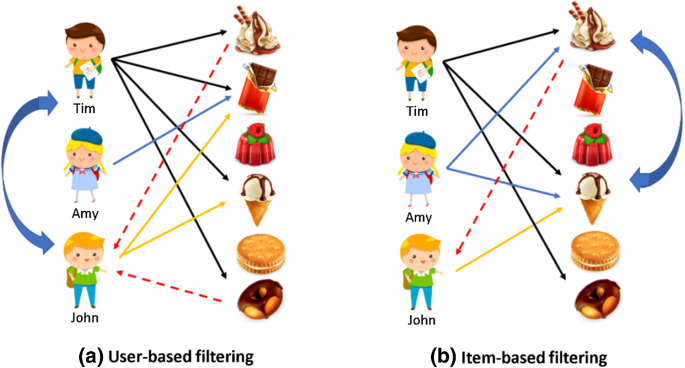

### <font color = 'orange'>Other type of Recommendation System</font>
1. `Content-based recommendation system` : **Content** here refers to the content or attribute of the products you like. So the idea in this system is to tag the products with certain keywords, understand what the user like, look up to those keywords in database and recommend the products with same attribute. Also some features are more important then others. This suggest that the system should assign weights to the features. 
2. `Hybrid recommendation system` : Combining any of the two systems in a manner that suits a particular industry is known as Hybrid Recommender system. This is the most sought after Recommender system that many companies look after, as it combines the strengths of more than two Recommender system and also eliminates any weakness which exist when only one recommender system is used.

#### Further Readings
- An introduction to recommendation engines [here](http://dataconomy.com/2015/03/an-introduction-to-recommendation-engines/)
- Types of recommendation system [here](https://www.bluepiit.com/blog/classifying-recommender-systems/)
- How Netflix implements its recommendation engine in their two-part blog [here](https://netflixtechblog.com/netflix-recommendations-beyond-the-5-stars-part-1-55838468f429)
- What's difference between item-based and content-based collaborative filtering? [here](https://stackoverflow.com/questions/16372191/whats-difference-between-item-based-and-content-based-collaborative-filtering)

---
## <font color = 'orange'>Topics Covered in this notebook</font>
1. User based recommendation
    - Model development
    - User based prediction
    - Evaluation
2. Item based recommendation
    - Model development
    - Item based prediction
    - Evaluation

In [ ]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading movies file

movies = pd.read_csv('/kaggle/input/movielens-latest-small/movies.csv', encoding='latin-1')
movies.head()

In [ ]:
print('Shape:', movies.shape)
print('Movie ids:', movies.movieId.nunique())
print('Titles:', movies.title.nunique())

It is been oberved that there is a `mismatch between unique movieids and unique title`.<br>
There are 5 more ids than the movies i.e. **there is 5 such movies who has stored in this table with two different ids**.

In [ ]:
# Reading ratings file

ratings = pd.read_csv('/kaggle/input/movielens-latest-small/ratings.csv', encoding='latin-1')
ratings.head()

In [ ]:
print('Shape:', ratings.shape)
print('Movie ids:', ratings.movieId.nunique())
print('Number of users:', ratings.userId.nunique())

#### <font color = 'brown'>Fixing the mismatch between 'movieId' and 'titles'

In [ ]:
# These are the movies that have been stored with two different ids

movies.title.value_counts().sort_values(ascending=False).head(5)

In [ ]:
# getting the ids of a movie
movies[movies['title'] == 'Saturn 3 (1980)']

In [ ]:
# checking those ids in 'rating' dataframe and count which id is most watched
ratings[(ratings['movieId'] == 2851) | (ratings['movieId'] == 168358)]['movieId'].value_counts()

In [ ]:
# deleting the id who is less watched
movies = movies[movies['movieId'] != 168358]

In [ ]:
# getting the ids of a movie
movies[movies['title'] == 'Confessions of a Dangerous Mind (2002)']

In [ ]:
# checking those ids in 'rating' dataframe and count which id is most watched
ratings[(ratings['movieId'] == 6003) | (ratings['movieId'] == 144606)]['movieId'].value_counts()

In [ ]:
# deleting the id who is less watched
movies = movies[movies['movieId'] != 144606]

In [ ]:
# getting the ids of a movie
movies[movies['title'] == 'Emma (1996)']

In [ ]:
# checking those ids in 'rating' dataframe and count which id is most watched
ratings[(ratings['movieId'] == 838) | (ratings['movieId'] == 26958)]['movieId'].value_counts()

In [ ]:
# deleting the id who is less watched
movies = movies[movies['movieId'] != 26958]

In [ ]:
# getting the ids of a movie
movies[movies['title'] == 'War of the Worlds (2005)']

In [ ]:
# checking those ids in 'rating' dataframe and count which id is most watched
ratings[(ratings['movieId'] == 34048) | (ratings['movieId'] == 64997)]['movieId'].value_counts()

In [ ]:
# deleting the id who is less watched
movies = movies[movies['movieId'] != 64997]

In [ ]:
# getting the ids of a movie
movies[movies['title'] == 'Eros (2004)']

In [ ]:
# checking those ids in 'rating' dataframe and count which id is most watched
ratings[(ratings['movieId'] == 32600) | (ratings['movieId'] == 147002)]['movieId'].value_counts()

In [ ]:
# deleting the id who is less watched
movies = movies[movies['movieId'] != 147002]

#### <font color = 'brown'>Merging 'movies' and 'rating' dataframe into one

In [ ]:
movies_ratings = pd.merge(movies, ratings, on='movieId')
movies_ratings.head()

In [ ]:
movies_ratings.shape

In [ ]:
# dropping 'timestamp' column
movies_ratings = movies_ratings[['userId','movieId', 'title', 'genres', 'rating']]

# sort the dataframe according to 'userId' and then 'movieId'
movies_ratings.sort_values(['userId','movieId'], inplace=True)

# resetting the index
movies_ratings.reset_index(drop=True, inplace=True)

# top 10 rows
movies_ratings.head(10)

In [ ]:
# number of customer ids
movies_ratings.userId.nunique()

In [ ]:
# number of movie ids
movies_ratings.movieId.nunique()

In [ ]:
# number of movie titles
movies_ratings.title.nunique()

In [ ]:
# removing the extra whitespaces(if any) from the column 'title' and 'genres'
movies_ratings['title'] = movies_ratings['title'].str.strip()
movies_ratings['genres'] = movies_ratings['genres'].str.strip()

# extracting the 'year'
movies_ratings['year'] = movies_ratings['title'].str[-5:-1]

In [ ]:
movies_ratings.year.unique()

- It is observed that in the last 4 rows, at some places there are string.
- Looking at the data on those string, it has been found that those movies year are not mentioned. Also some of the movies genre is also not available.
- Below I fill those missing year and genres of the movies/shows by searching online.

#### <font color = 'brown'>Replacing strings with year

In [ ]:
movies_ratings['year'] = movies_ratings['year'].replace('irro',2011)
movies_ratings['year'] = movies_ratings['year'].replace('atso',2011)
movies_ratings['year'] = movies_ratings['year'].replace(' Bab',2017)
movies_ratings['year'] = movies_ratings['year'].replace('ron ',2017)
movies_ratings['year'] = movies_ratings['year'].replace('r On',2018)
movies_ratings['year'] = movies_ratings['year'].replace('lon ',1994)
movies_ratings['year'] = movies_ratings['year'].replace('imal',2016)
movies_ratings['year'] = movies_ratings['year'].replace('osmo',2019)
movies_ratings['year'] = movies_ratings['year'].replace('he O',2016)
movies_ratings['year'] = movies_ratings['year'].replace(' Roa',2015)
movies_ratings['year'] = movies_ratings['year'].replace('ligh',2016)
movies_ratings['year'] = movies_ratings['year'].replace('erso',2016)

In [ ]:
# movieIds where genre is missing

movies_ratings[movies_ratings['genres']=='(no genres listed)'].drop_duplicates('movieId')['movieId'].values

#### <font color = 'brown'>Replacing the missing genres of the movies

In [ ]:
movies_ratings.loc[movies_ratings['movieId']==122896,"genres"] = 'Adventure|Action|Fantasy'
movies_ratings.loc[movies_ratings['movieId']==114335,"genres"] = 'Fantasy'
movies_ratings.loc[movies_ratings['movieId']==174403,"genres"] = 'Documentary|Biography'
movies_ratings.loc[movies_ratings['movieId']==172591,"genres"] = 'Crime|Drama|Thriller'
movies_ratings.loc[movies_ratings['movieId']==176601,"genres"] = 'Sci-Fi|Fantasy'
movies_ratings.loc[movies_ratings['movieId']==155589,"genres"] = 'Comedy'
movies_ratings.loc[movies_ratings['movieId']==147250,"genres"] = 'Crime|Mystery|Romance'
movies_ratings.loc[movies_ratings['movieId']==171749,"genres"] = 'Animation|Crime|Drama'
movies_ratings.loc[movies_ratings['movieId']==173535,"genres"] = 'Crime|Drama|Mystery'
movies_ratings.loc[movies_ratings['movieId']==134861,"genres"] = 'Comedy'
movies_ratings.loc[movies_ratings['movieId']==159161,"genres"] = 'Comedy'
movies_ratings.loc[movies_ratings['movieId']==171631,"genres"] = 'Documentary|Comedy'
movies_ratings.loc[movies_ratings['movieId']==171891,"genres"] = 'Documentary'
movies_ratings.loc[movies_ratings['movieId']==142456,"genres"] = 'Comedy|Fantasy'
movies_ratings.loc[movies_ratings['movieId']==181413,"genres"] = 'Documentary'
movies_ratings.loc[movies_ratings['movieId']==159779,"genres"] = 'Comedy|Fantasy'
movies_ratings.loc[movies_ratings['movieId']==169034,"genres"] = 'Musical'
movies_ratings.loc[movies_ratings['movieId']==171495,"genres"] = 'Sci-Fi'
movies_ratings.loc[movies_ratings['movieId']==172497,"genres"] = 'Action|Sci-Fi'
movies_ratings.loc[movies_ratings['movieId']==166024,"genres"] = 'Drama|Music'
movies_ratings.loc[movies_ratings['movieId']==167570,"genres"] = 'Drama|Fantasy|Mystery'
movies_ratings.loc[movies_ratings['movieId']==129250,"genres"] = 'Comedy'
movies_ratings.loc[movies_ratings['movieId']==143410,"genres"] = 'Action|Drama|War'
movies_ratings.loc[movies_ratings['movieId']==149330,"genres"] = 'Animation|Sci-Fi'
movies_ratings.loc[movies_ratings['movieId']==182727,"genres"] = 'Musical'
movies_ratings.loc[movies_ratings['movieId']==152037,"genres"] = 'Romance|Musical'
movies_ratings.loc[movies_ratings['movieId']==165489,"genres"] = 'Drama|Animation|History'
movies_ratings.loc[movies_ratings['movieId']==141866,"genres"] = 'Horror|Music|Thriller'
movies_ratings.loc[movies_ratings['movieId']==122888,"genres"] = 'Action|Adventure|Drama'
movies_ratings.loc[movies_ratings['movieId']==156605,"genres"] = 'Comedy|Drama|Romance'
movies_ratings.loc[movies_ratings['movieId']==141131,"genres"] = 'Action|Mystery|Sci-Fi'
movies_ratings.loc[movies_ratings['movieId']==181719,"genres"] = 'Biography|Drama'
movies_ratings.loc[movies_ratings['movieId']==132084,"genres"] = 'Drama|Romance'
movies_ratings.loc[movies_ratings['movieId']==161008,"genres"] = 'Drama|Music|Romance'

In [ ]:
# replacing 'musical' with 'music' as both have same meaning
movies_ratings['genres'] = movies_ratings['genres'].str.replace('Musical','Music')

In [ ]:
# converting string to int
movies_ratings['year'] = movies_ratings['year'].astype(int)

In [ ]:
movies_ratings.info()

In [ ]:
movies_ratings.head()

#### <font color = 'brown'>Working on 'genres' column</font>
1. Put that column in another dataframe and split the column on '|'
2. Then we find the unique genres throughout the dataframe and store it as a set
3. Finally making column of each of the genre in our main dataframe(movies_rating) and the values of each column is 1 or 0. 1 if that movie has that genre, 0 if not.

In [ ]:
# store the column in different dataframe
genre_df = movies_ratings[['genres']]

# splitting the columns
genre_df = genre_df['genres'].str.split('|', expand=True)

genre_df.head()

In [ ]:
# changing the name of the columns
genre_df.rename(columns={0:'G1',1:'G2',2:'G3',3:'G4',4:'G5',5:'G6',6:'G7',7:'G8',8:'G9',9:'G10'}, inplace=True)

In [ ]:
# create a function that return distinct genres from whole dataframe

def genre_name(dataframe):
    df = dataframe.copy()
    col = df.columns
    u = set()
    for i in col:
        s = set(df[i].value_counts().index)
        u = u.union(s)
    return(u)

In [ ]:
# names of distinct genres (21 genres)
g = genre_name(genre_df)
g

In [ ]:
# making columns of each of the genes with value either 1 or 0 in original dataframe 

for genre in g:
    movies_ratings[genre] = movies_ratings['genres'].apply(lambda x: 1 if genre in x else 0)

#### <font color = 'brown'>Finally the data is ready

In [ ]:
movies_ratings.head()

---
# <font color = 'blue'>Graphs

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(movies_ratings['rating'],bins=10, color='pink', alpha=0.7)
plt.xlabel('rating',size=12)
plt.xlim(0.5,5)
plt.ylim(0,30000)
plt.vlines(x=3.5, ymin=0, ymax=30000, color='red', label='Mean rating')
plt.ylabel('')
plt.title('count plot of ratings',size=18, color='red')
plt.legend()
plt.show()

In [ ]:
genres_count = movies_ratings.iloc[:,6:].sum(axis=0).reset_index().rename(columns={'index':'genre',0:'count'})
genres_count.sort_values('count',ascending=False, inplace=True)

plt.figure(figsize=(15,5))
sns.barplot(x = genres_count['genre'], y=genres_count['count'], color='lightgreen')
plt.xticks(rotation=45)
plt.xlabel('Genres', size=12)
plt.ylabel('')
plt.title('Count plot of genres', size=18, color='green')
plt.show()

In [ ]:
mr = movies_ratings.groupby('title')['title'].count().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
sns.barplot(y = mr.index, x=mr.values, color='skyblue')
plt.ylabel('')
plt.title('15 Most watched Movies', size=18, color='blue')
plt.show()

In [ ]:
user = movies_ratings.groupby('userId')['title'].count().sort_values(ascending=False).head(20)

plt.figure(figsize=(15,5))
user.plot(kind="bar", color="orange", alpha=0.5)
plt.title("Top 20 users according to watched history", size=18, color='orange')
plt.xlabel('User Id', size=12)
plt.xticks(rotation=0)
plt.show()

In [ ]:
def best_movie(dataframe):
    """
    This function will return a dataframe in which there are 3 columns. The first column is year.
    The second column is number of movies released in that year. (according to data we have)
    Third column is the most watched movie of that year. (in the given data)
    It only takes one argument which is data.
    """
    df = dataframe.copy()
    movieid = df.year.unique()
    year = list()
    nMovies= list()
    mostWatched = list()
    for i in movieid:
        year.append(i)
        nMovies.append(df[df['year']==i]['title'].nunique())
        mostWatched.append(df[df['year']==i]['title'].value_counts().index[0])
    
    df1 = pd.DataFrame({'year':year,'nMoviesReleased':nMovies, 'mostWatchedMovie':mostWatched})
    df1.sort_values('year', inplace=True)
    return(df1)

In [ ]:
# calling the function and reading its top 10 rows
yearWiseBestMovie = best_movie(movies_ratings)
yearWiseBestMovie.head(10)

### <font color = 'blue'>Dividing the dataset into train and test

In [ ]:
train, test = train_test_split(ratings, test_size=0.30, random_state=31)

In [ ]:
print(train.shape)
print(test.shape)

### <font color = 'blue'>Copy train and test dataset</font>
These dataset will be used for prediction and evaluation. 
- Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction. 
- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [ ]:
dummy_train = train.copy()
dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x>=1 else 1)

dummy_test = test.copy()
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

In [ ]:
# The movies not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(1)

# The movies not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)

In [ ]:
# 1 means not watched by user and 0 means watched by user
dummy_train.head()

In [ ]:
dummy_train.shape

In [ ]:
# 0 means not watched by user and 1 means watched by user
dummy_test.head()

In [ ]:
dummy_test.shape

---
# <font color = 'orange'>I. User Based Recommendation

## <font color = 'blue'>A. Model Development

#### <font color = 'blue'>Using Cosine Similarity</font>
>Here, replacing the NaN values with 0

In [ ]:
# pivot ratings into movie features
df_movie_features = train.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)

In [ ]:
df_movie_features.head()

In [ ]:
df_movie_features.shape

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix using 'cosine' measure

user_correlation = 1 - pairwise_distances(df_movie_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

In [ ]:
user_correlation.shape

#### <font color = 'red'>How to read the above output</font>
what will happen in **pairwise_distances** is that it will do pairwise multiplication of elements between each user(or row of the *df_movie_features*) and divided by square root of summing of squaring of each value of both the rows. <br>
Here we see how much a user is similar or dissimilar to all the other users.<br>
ex - 

                    userId1 . userId2(this is the dot product)
                    -------------------------------------------
                        sqrt(userId1^2) x sqrt(userId2^2)

- The given output was 610x610 metrics (because there are 610 users) in which diagonal is 1 and the values above the diagonal and below the diagonal are same and represents the distance.
- The first row of the metrics is of **user 1** and show the pairwise distance with all the other users. Similarly second row is of **user 2** and show the pairwise distance with all the other users and so on.

#### <font color = 'blue'>Using Adjusted Cosine</font>
>Here, not removing the NaN values and calculating the mean only for the movies rated by the user

In [ ]:
movie_features = train.pivot(
    index='userId',
    columns='movieId',
    values='rating')

In [ ]:
movie_features.head()

In [ ]:
movie_features.shape

#### Normalising the rating of the movie for each user aroung 0 mean
We are calculating the mean rating by each user excluding the NaN value. So consider user 1 who has watched 232 movies out of 8536. So we are calculating sum of rating given by user to those 232 movies divided by count of movies i.e. 232. Similarly for all the user we calculate the mean rating.

In [ ]:
mean = np.nanmean(movie_features, axis=1) # nanmean calculate the mean excluding NaN values
print(mean.shape)

In [ ]:
# finally subtracting each user mean rating from its own values

df_subtracted = (movie_features.T - mean).T
df_subtracted.head()

In [ ]:
df_subtracted.shape

#### Finding cosine similarity

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

In [ ]:
user_correlation.shape

## <font color = 'blue'>B. Prediction

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [ ]:
user_correlation[user_correlation<0]=0
user_correlation

Rating predicted by the user (for movies rated as well as not rated) is the weighted sum of correlation with the movie rating (as present in the rating dataset). 

`np.dot` is the dot product of two matrices.

    |A B| . |E F|  =  |A*E+B*G  A*F+B*H|
    |C D|   |G H|     |C*E+D*G  C*F+D*H|

In [ ]:
# These are the scores of all the movies by all users 

user_predicted_ratings = np.dot(user_correlation, movie_features.fillna(0)) # 610x610 . 610x8536 = 610x8536
user_predicted_ratings

In [ ]:
user_predicted_ratings.shape

Since we are interested only in the movies not rated by the user, we will ignore the movies rated by the user by making it zero. 

`np.multiply` does an element-wise multiplication of two matrices

        |A B|  ⊙ |E F| =  |A*E  B*F|
        |C D|     |G H|    |C*G  D*H|

In [ ]:
user_final_rating = np.multiply(user_predicted_ratings, dummy_train)   # 610x8536 x 610x8536 = 610x8536
user_final_rating.head()

#### <font color = 'red'>What we have done above ?</font>
- In *dummy_train*, what we had done previously is that we make all those movie ratings to 0 which the user already watched (or for which user provide rating already).
- Now by multiplying *user_predicted_ratings* with *dummy_train*, what we do is we multiply each user ratings in user_predicted_ratings with that of its dummy_train ratings and hence those values becomes 0 which is already watched or rating is given by the user. 
- For which the rating is not given by user in dummy_train has set to 1 previously and hence when multiplied by user_predicted_ratings gives some value. 

---
### Top 10 recommended movies to users</font>
Created a function in which you just need to give the user_id and it will return you the top 10 recommended movies for that user.

In [ ]:
def top_10_movies_for_user(i):
    user_i = user_final_rating.iloc[i].to_frame()
    user_i.reset_index(inplace=True)
    user_i.rename(columns= {'movieId':'movieId', i+1:'ratings'}, inplace=True)
    user_join_i = pd.merge(user_i, movies, on='movieId')
    return user_join_i.sort_values(by=["ratings"], ascending=False)[0:10]

In [ ]:
top_10_movies_for_user(540)

## <font color = 'blue'>C. Evaluation</font>
Evaluation will be same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the user instead of predicting it for the movie not rated by the user. 

In [ ]:
test_movie_features = test.pivot(
    index='userId',
    columns='movieId',
    values='rating')

test_movie_features.head()

In [ ]:
mean = np.nanmean(test_movie_features, axis=1)
test_df_subtracted = (test_movie_features.T-mean).T

In [ ]:
# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

In [ ]:
test_user_correlation.shape

In [ ]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_movie_features.fillna(0))
test_user_predicted_ratings

In [ ]:
test_user_predicted_ratings.shape

#### Doing prediction for the movies rated by the user

In [ ]:
test_user_final_rating = np.multiply(test_user_predicted_ratings, dummy_test)

In [ ]:
test_user_final_rating.head()

#### Calculating the RMSE for only the movies rated by user. For  RMSE, normalising the rating to (1,5) range. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

In [ ]:
test_ = test.pivot(
    index='userId',
    columns='movieId',
    values='rating')

In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [ ]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

---
# <font color = 'orange'>II. Item Based Recommendation

## <font color = 'blue'>A. Model Development

Using Correlation

Taking the transpose of the rating matrix to normalize the rating around the mean for different movie ID. In the user based similarity, we had taken mean for each user intead of each movie. 

In [ ]:
movie_features = train.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).T

movie_features.head()

#### Normalising the movie rating for each movie
We are calculating the mean rating of each movie excluding the NaN value. So consider movie 1 who has beem watched by 215 users out of 610 users. So we are calculating sum of rating given by each user to this movie-1 divided by count of users i.e. 610. Similarly for all the movies we calculate the mean rating.

In [ ]:
mean = np.nanmean(movie_features, axis=1) # nanmean calculate the mean excluding NaN values
print(mean.shape)

In [ ]:
# finally subtracting each user mean rating from its own values

df_subtracted = (movie_features.T-mean).T
df_subtracted.head()

In [ ]:
df_subtracted.shape

#### Finding the cosine similarity
Note that since the data is normalised, both the cosine metric and correlation metric will give the same value. 

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

In [ ]:
item_correlation.shape

#### <font color = 'red'>How to read the above output</font>
what will happen in **pairwise_distances** is that it will do pairwise multiplication of elements between each movie(or row of the *movie_features*) and divided by square root of summing of squaring of each value of both the rows. <br>
Here we see how much a movie is similar or dissimilar to all the other movies.<br>
ex - 

                    movieId1 . movieId2(this is the dot product)
                    -------------------------------------------
                        sqrt(movieId1^2) x sqrt(movieId2^2)

- The given output was 8536x8536 metrics (because there are 8536 movies) in which diagonal is 1 and the values above the diagonal and below the diagonal are same and represents the distance.
- The first row of the metrics is of **movie 1** and show the pairwise distance with all the other movies. Similarly second row is of **movie 2** and show the pairwise distance with all the other movies and so on.

Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [ ]:
item_correlation[item_correlation<0]=0
item_correlation

## <font color = 'blue'>B. Prediction

In [ ]:
item_predicted_ratings = np.dot((movie_features.fillna(0).T), item_correlation)
item_predicted_ratings

In [ ]:
item_predicted_ratings.shape

In [ ]:
dummy_train.shape

#### Filtering the rating only for the movies not rated by the user for recommendation

In [ ]:
item_final_rating = np.multiply(item_predicted_ratings, dummy_train)
item_final_rating.head()

---
### Top 10 recommended movies to users</font>
Created a function in which you just need to give the user_id and it will return you the top 10 recommended movies for that user.

In [ ]:
def top_10_movies_for_user(i):
    user_i = item_final_rating.iloc[i].to_frame()
    user_i.reset_index(inplace=True)
    user_i.rename(columns= {'movieId':'movieId', i+1:'ratings'},inplace=True)
    user_join_i = pd.merge(user_i,movies,on='movieId')
    return user_join_i.sort_values(by=["ratings"],ascending=False)[0:10]

In [ ]:
top_10_movies_for_user(540)

## <font color = 'blue'>C. Evaluation

Evaluation will be same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the user instead of predicting it for the movie not rated by the user. 

In [ ]:
test_movie_features = test.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).T

In [ ]:
mean = np.nanmean(test_movie_features, axis=1)
test_df_subtracted = (test_movie_features.T-mean).T

In [ ]:
test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [ ]:
test_item_correlation.shape

In [ ]:
test_movie_features.shape

In [ ]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_movie_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

In [ ]:
test_ = test.pivot(
    index='userId',
    columns='movieId',
    values='rating')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

test_ = test.pivot(
    index='userId',
    columns='movieId',
    values='rating')

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

#### Finding RMSE

In [ ]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

***Thank-you***